PART 03 R 분석

> CHAPTER 03 제2유형: 데이터 분석
> >SECTION 04 비지도학습
> > >**01 군집분석을 이용한 문제 해결**

In [1]:
library(dplyr)        # dplyr 패키지 임포트
library(ggplot2)      # ggplot2 패키지 임포트


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# R에서 제공하는 iris 데이터셋을 불러온다.
df <- iris
df

Sepal.Length Sepal.Width Petal.Length Petal.Width Species  
1   5.1          3.5         1.4          0.2         setosa   
2   4.9          3.0         1.4          0.2         setosa   
3   4.7          3.2         1.3          0.2         setosa   
4   4.6          3.1         1.5          0.2         setosa   
5   5.0          3.6         1.4          0.2         setosa   
6   5.4          3.9         1.7          0.4         setosa   
7   4.6          3.4         1.4          0.3         setosa   
8   5.0          3.4         1.5          0.2         setosa   
9   4.4          2.9         1.4          0.2         setosa   
10  4.9          3.1         1.5          0.1         setosa   
11  5.4          3.7         1.5          0.2         setosa   
12  4.8          3.4         1.6          0.2         setosa   
13  4.8          3.0         1.4          0.1         setosa   
14  4.3          3.0         1.1          0.1         setosa   
15  5.8          4.0         1.2          0.2         setosa   
16  5.7          4.4         1.5          0.4         setosa   
17  5.4          3.9         1.3          0.4         setosa   
18  5.1          3.5         1.4          0.3         setosa   
19  5.7          3.8         1.7          0.3         setosa   
20  5.1          3.8         1.5          0.3         setosa   
21  5.4          3.4         1.7          0.2         setosa   
22  5.1          3.7         1.5          0.4         setosa   
23  4.6          3.6         1.0          0.2         setosa   
24  5.1          3.3         1.7          0.5         setosa   
25  4.8          3.4         1.9          0.2         setosa   
26  5.0          3.0         1.6          0.2         setosa   
27  5.0          3.4         1.6          0.4         setosa   
28  5.2          3.5         1.5          0.2         setosa   
29  5.2          3.4         1.4          0.2         setosa   
30  4.7          3.2         1.6          0.2         setosa   
⋮   ⋮            ⋮           ⋮            ⋮           ⋮        
121 6.9          3.2         5.7          2.3         virginica
122 5.6          2.8         4.9          2.0         virginica
123 7.7          2.8         6.7          2.0         virginica
124 6.3          2.7         4.9          1.8         virginica
125 6.7          3.3         5.7          2.1         virginica
126 7.2          3.2         6.0          1.8         virginica
127 6.2          2.8         4.8          1.8         virginica
128 6.1          3.0         4.9          1.8         virginica
129 6.4          2.8         5.6          2.1         virginica
130 7.2          3.0         5.8          1.6         virginica
131 7.4          2.8         6.1          1.9         virginica
132 7.9          3.8         6.4          2.0         virginica
133 6.4          2.8         5.6          2.2         virginica
134 6.3          2.8         5.1          1.5         virginica
135 6.1          2.6         5.6          1.4         virginica
136 7.7          3.0         6.1          2.3         virginica
137 6.3          3.4         5.6          2.4         virginica
138 6.4          3.1         5.5          1.8         virginica
139 6.0          3.0         4.8          1.8         virginica
140 6.9          3.1         5.4          2.1         virginica
141 6.7          3.1         5.6          2.4         virginica
142 6.9          3.1         5.1          2.3         virginica
143 5.8          2.7         5.1          1.9         virginica
144 6.8          3.2         5.9          2.3         virginica
145 6.7          3.3         5.7          2.5         virginica
146 6.7          3.0         5.2          2.3         virginica
147 6.3          2.5         5.0          1.9         virginica
148 6.5          3.0         5.2          2.0         virginica
149 6.2          3.4         5.4          2.3         virginica
150 5.9          3.0         5.1          1.8         virginica

In [4]:
str(df)      # 데이터프레임 구조

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [5]:
sum(is.na(df))     # 결측치 개수를 출력

[1] 0

In [6]:
# Species 컬럼은 레이블 인코딩을 수행
# 'setosa':1, 'versicolor':2, 'virginica':3
df$Species <- as.numeric(factor(df$Species), level=c("setosa","versicolor","virginica"))
df

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1   5.1          3.5         1.4          0.2         1      
2   4.9          3.0         1.4          0.2         1      
3   4.7          3.2         1.3          0.2         1      
4   4.6          3.1         1.5          0.2         1      
5   5.0          3.6         1.4          0.2         1      
6   5.4          3.9         1.7          0.4         1      
7   4.6          3.4         1.4          0.3         1      
8   5.0          3.4         1.5          0.2         1      
9   4.4          2.9         1.4          0.2         1      
10  4.9          3.1         1.5          0.1         1      
11  5.4          3.7         1.5          0.2         1      
12  4.8          3.4         1.6          0.2         1      
13  4.8          3.0         1.4          0.1         1      
14  4.3          3.0         1.1          0.1         1      
15  5.8          4.0         1.2          0.2         1      
16  5.7          4.4         1.5          0.4         1      
17  5.4          3.9         1.3          0.4         1      
18  5.1          3.5         1.4          0.3         1      
19  5.7          3.8         1.7          0.3         1      
20  5.1          3.8         1.5          0.3         1      
21  5.4          3.4         1.7          0.2         1      
22  5.1          3.7         1.5          0.4         1      
23  4.6          3.6         1.0          0.2         1      
24  5.1          3.3         1.7          0.5         1      
25  4.8          3.4         1.9          0.2         1      
26  5.0          3.0         1.6          0.2         1      
27  5.0          3.4         1.6          0.4         1      
28  5.2          3.5         1.5          0.2         1      
29  5.2          3.4         1.4          0.2         1      
30  4.7          3.2         1.6          0.2         1      
⋮   ⋮            ⋮           ⋮            ⋮           ⋮      
121 6.9          3.2         5.7          2.3         3      
122 5.6          2.8         4.9          2.0         3      
123 7.7          2.8         6.7          2.0         3      
124 6.3          2.7         4.9          1.8         3      
125 6.7          3.3         5.7          2.1         3      
126 7.2          3.2         6.0          1.8         3      
127 6.2          2.8         4.8          1.8         3      
128 6.1          3.0         4.9          1.8         3      
129 6.4          2.8         5.6          2.1         3      
130 7.2          3.0         5.8          1.6         3      
131 7.4          2.8         6.1          1.9         3      
132 7.9          3.8         6.4          2.0         3      
133 6.4          2.8         5.6          2.2         3      
134 6.3          2.8         5.1          1.5         3      
135 6.1          2.6         5.6          1.4         3      
136 7.7          3.0         6.1          2.3         3      
137 6.3          3.4         5.6          2.4         3      
138 6.4          3.1         5.5          1.8         3      
139 6.0          3.0         4.8          1.8         3      
140 6.9          3.1         5.4          2.1         3      
141 6.7          3.1         5.6          2.4         3      
142 6.9          3.1         5.1          2.3         3      
143 5.8          2.7         5.1          1.9         3      
144 6.8          3.2         5.9          2.3         3      
145 6.7          3.3         5.7          2.5         3      
146 6.7          3.0         5.2          2.3         3      
147 6.3          2.5         5.0          1.9         3      
148 6.5          3.0         5.2          2.0         3      
149 6.2          3.4         5.4          2.3         3      
150 5.9          3.0         5.1          1.8         3

In [7]:
# Min-Max 정규화 함수 정의
normal <- function(x) (
    return ((x-min(x))/(max(x)-min(x)))
)
# 정규화 함수 적용
df[1:4] <- as.data.frame(lapply(df[1:4], normal))
df

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1   0.22222222   0.6250000   0.06779661   0.04166667  1      
2   0.16666667   0.4166667   0.06779661   0.04166667  1      
3   0.11111111   0.5000000   0.05084746   0.04166667  1      
4   0.08333333   0.4583333   0.08474576   0.04166667  1      
5   0.19444444   0.6666667   0.06779661   0.04166667  1      
6   0.30555556   0.7916667   0.11864407   0.12500000  1      
7   0.08333333   0.5833333   0.06779661   0.08333333  1      
8   0.19444444   0.5833333   0.08474576   0.04166667  1      
9   0.02777778   0.3750000   0.06779661   0.04166667  1      
10  0.16666667   0.4583333   0.08474576   0.00000000  1      
11  0.30555556   0.7083333   0.08474576   0.04166667  1      
12  0.13888889   0.5833333   0.10169492   0.04166667  1      
13  0.13888889   0.4166667   0.06779661   0.00000000  1      
14  0.00000000   0.4166667   0.01694915   0.00000000  1      
15  0.41666667   0.8333333   0.03389831   0.04166667  1      
16  0.38888889   1.0000000   0.08474576   0.12500000  1      
17  0.30555556   0.7916667   0.05084746   0.12500000  1      
18  0.22222222   0.6250000   0.06779661   0.08333333  1      
19  0.38888889   0.7500000   0.11864407   0.08333333  1      
20  0.22222222   0.7500000   0.08474576   0.08333333  1      
21  0.30555556   0.5833333   0.11864407   0.04166667  1      
22  0.22222222   0.7083333   0.08474576   0.12500000  1      
23  0.08333333   0.6666667   0.00000000   0.04166667  1      
24  0.22222222   0.5416667   0.11864407   0.16666667  1      
25  0.13888889   0.5833333   0.15254237   0.04166667  1      
26  0.19444444   0.4166667   0.10169492   0.04166667  1      
27  0.19444444   0.5833333   0.10169492   0.12500000  1      
28  0.25000000   0.6250000   0.08474576   0.04166667  1      
29  0.25000000   0.5833333   0.06779661   0.04166667  1      
30  0.11111111   0.5000000   0.10169492   0.04166667  1      
⋮   ⋮            ⋮           ⋮            ⋮           ⋮      
121 0.7222222    0.5000000   0.7966102    0.9166667   3      
122 0.3611111    0.3333333   0.6610169    0.7916667   3      
123 0.9444444    0.3333333   0.9661017    0.7916667   3      
124 0.5555556    0.2916667   0.6610169    0.7083333   3      
125 0.6666667    0.5416667   0.7966102    0.8333333   3      
126 0.8055556    0.5000000   0.8474576    0.7083333   3      
127 0.5277778    0.3333333   0.6440678    0.7083333   3      
128 0.5000000    0.4166667   0.6610169    0.7083333   3      
129 0.5833333    0.3333333   0.7796610    0.8333333   3      
130 0.8055556    0.4166667   0.8135593    0.6250000   3      
131 0.8611111    0.3333333   0.8644068    0.7500000   3      
132 1.0000000    0.7500000   0.9152542    0.7916667   3      
133 0.5833333    0.3333333   0.7796610    0.8750000   3      
134 0.5555556    0.3333333   0.6949153    0.5833333   3      
135 0.5000000    0.2500000   0.7796610    0.5416667   3      
136 0.9444444    0.4166667   0.8644068    0.9166667   3      
137 0.5555556    0.5833333   0.7796610    0.9583333   3      
138 0.5833333    0.4583333   0.7627119    0.7083333   3      
139 0.4722222    0.4166667   0.6440678    0.7083333   3      
140 0.7222222    0.4583333   0.7457627    0.8333333   3      
141 0.6666667    0.4583333   0.7796610    0.9583333   3      
142 0.7222222    0.4583333   0.6949153    0.9166667   3      
143 0.4166667    0.2916667   0.6949153    0.7500000   3      
144 0.6944444    0.5000000   0.8305085    0.9166667   3      
145 0.6666667    0.5416667   0.7966102    1.0000000   3      
146 0.6666667    0.4166667   0.7118644    0.9166667   3      
147 0.5555556    0.2083333   0.6779661    0.7500000   3      
148 0.6111111    0.4166667   0.7118644    0.7916667   3      
149 0.5277778    0.5833333   0.7457627    0.9166667   3      
150 0.4444444    0.4166667   0.6949153    0.7083333   3

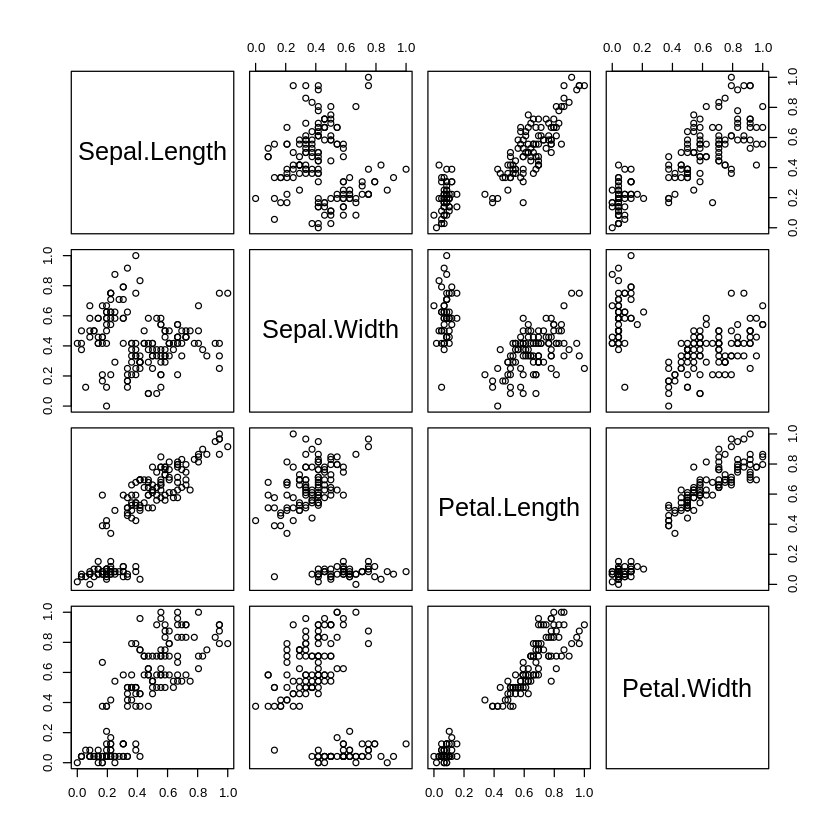

In [8]:
# 변수간 상관관계 시각화
pairs(df[,-5])

In [9]:
# K-means 클러스터링
cluster1 <- kmeans(df[,-5],centers = 2, iter.max=1000)
cluster1

K-means clustering with 2 clusters of sizes 50, 100

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1    0.1961111   0.5950000   0.07830508  0.06083333
2    0.5450000   0.3633333   0.66203390  0.65666667

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1]  1.829062 10.298729
 (between_SS / total_SS =  70.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

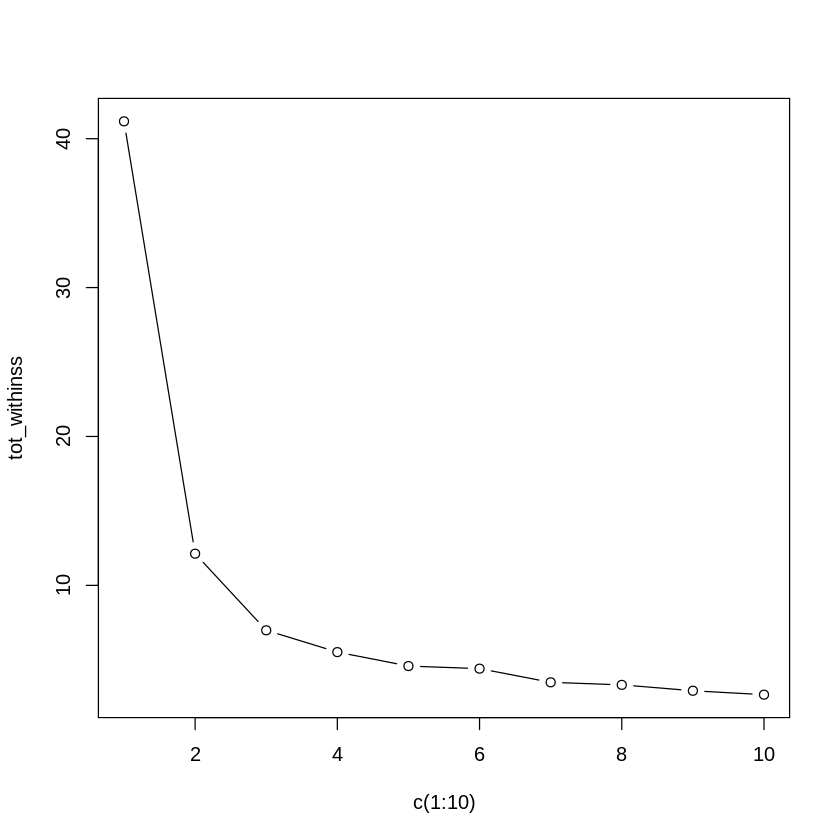

In [10]:
# 군집내 분산을 계산하여 최적의 k값을 찾는다.
# total within-cluster sum of squares
tot_withinss <- c()

for (i in 1:10){
    cluster1 <- kmeans(df[,-5], centers = i, iter.max=1000)
    tot_withinss[i] <- cluster1$tot.withinss
}

plot(c(1:10), tot_withinss, type = "b")

>>>**02 연관분석을 이용한 문제 해결**

In [11]:
library(dplyr)      # dplyr 패키지 임포트
library(ggplot2)    # ggplot2 패키지 임포트

# 연관분석을 위한 arules 패키지 설치
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [13]:
# csv 파일을 트랜잭션 형태로 읽어온다.
tr <- read.transactions("sample_data/retail_dataset.csv", format="basket", sep=",")

In [14]:
inspect(tr)

      items                                             
[1]   {0, 1, 2, 3, 4, 5, 6}                             
[2]   {Bread, Cheese, Diaper, Eggs, Meat, Pencil, Wine} 
[3]   {Bread, Cheese, Diaper, Meat, Milk, Pencil, Wine} 
[4]   {Cheese, Eggs, Meat, Milk, Wine}                  
[5]   {Cheese, Eggs, Meat, Milk, Wine}                  
[6]   {Meat, Pencil, Wine}                              
[7]   {Bagel, Bread, Diaper, Eggs, Milk, Pencil, Wine}  
[8]   {Cheese, Eggs, Pencil, Wine}                      
[9]   {Bagel, Bread, Diaper, Milk, Pencil}              
[10]  {Bread, Cheese, Diaper, Eggs, Milk, Wine}         
[11]  {Bagel, Cheese, Diaper, Eggs, Meat, Pencil, Wine} 
[12]  {Cheese, Eggs, Meat, Milk, Wine}                  
[13]  {Bagel, Bread, Diaper, Eggs, Meat, Milk, Wine}    
[14]  {Bagel, Bread, Diaper, Meat, Pencil}              
[15]  {Bagel, Cheese, Meat, Milk}                       
[16]  {Bread}                                           
[17]  {Bagel, Diaper, Pencil}  

In [15]:
tr <- tr[-1]
inspect(tr[1:5])

    items                                            
[1] {Bread, Cheese, Diaper, Eggs, Meat, Pencil, Wine}
[2] {Bread, Cheese, Diaper, Meat, Milk, Pencil, Wine}
[3] {Cheese, Eggs, Meat, Milk, Wine}                 
[4] {Cheese, Eggs, Meat, Milk, Wine}                 
[5] {Meat, Pencil, Wine}                             


In [16]:
# 트랜잭션 특징 확인
summary(tr)

transactions as itemMatrix in sparse format with
 315 rows (elements/itemsets/transactions) and
 16 columns (items) and a density of 0.253373 

most frequent items:
  Bread  Cheese    Milk    Meat    Eggs (Other) 
    159     158     158     150     138     514 

element (itemset/transaction) length distribution:
sizes
 1  2  3  4  5  6  7 
30 40 58 54 62 30 41 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.054   5.000   7.000 

includes extended item information - examples:
  labels
1      0
2      1
3      2

In [17]:
# apriori 함수 적용
rules <- apriori(tr, parameter = list(support=0.2, confidence=0.5))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 63 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[9 item(s), 315 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [38 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 38 rules 

In [18]:
# 도출된 규칙 출력
inspect(sort(rules, by=c("confidence"), decresing=T))

     lhs               rhs      support   confidence coverage  lift      count
[1]  {Meat, Milk}   => {Cheese} 0.2031746 0.8311688  0.2444444 1.6570771  64  
[2]  {Eggs, Meat}   => {Cheese} 0.2158730 0.8095238  0.2666667 1.6139241  68  
[3]  {Cheese, Eggs} => {Meat}   0.2158730 0.7234043  0.2984127 1.5191489  68  
[4]  {Eggs}         => {Cheese} 0.2984127 0.6811594  0.4380952 1.3580077  94  
[5]  {Meat}         => {Cheese} 0.3238095 0.6800000  0.4761905 1.3556962 102  
[6]  {Cheese, Meat} => {Eggs}   0.2158730 0.6666667  0.3238095 1.5217391  68  
[7]  {Cheese, Milk} => {Meat}   0.2031746 0.6666667  0.3047619 1.4000000  64  
[8]  {Bagel}        => {Bread}  0.2793651 0.6567164  0.4253968 1.3010420  88  
[9]  {Cheese}       => {Meat}   0.3238095 0.6455696  0.5015873 1.3556962 102  
[10] {Cheese, Meat} => {Milk}   0.2031746 0.6274510  0.3238095 1.2509308  64  
[11] {Wine}         => {Cheese} 0.2698413 0.6159420  0.4380952 1.2279857  85  
[12] {Eggs}         => {Meat}   0.2666667 0.6086957 